# [HR-Employee-Attrition](https://www.kaggle.com/pavansubhasht/ibm-hr-analytics-attrition-dataset)

<a href="https://www.indusnet.co.in/what-are-predictive-metrics-and-how-can-it-help-you-predict-employee-turnover/"><img src="../images/hr_attrition.jpg"></a>

Uncover the factors that lead to employee attrition and explore important questions such as ‘show me a breakdown of distance from home by job role and attrition’ or ‘compare average monthly income by education and attrition’. This is a fictional data set created by IBM data scientists.
- `Education`: 1 'Below College' 2 'College' 3 'Bachelor' 4 'Master' 5 'Doctor'
- `EnvironmentSatisfaction`: 1 'Low' 2 'Medium' 3 'High' 4 'Very High'
- `JobInvolvement`: 1 'Low' 2 'Medium' 3 'High' 4 'Very High'
- `JobSatisfaction`: 1 'Low' 2 'Medium' 3 'High' 4 'Very High'
- `PerformanceRating`: 1 'Low' 2 'Good' 3 'Excellent' 4 'Outstanding'
- `RelationshipSatisfaction`: 1 'Low' 2 'Medium' 3 'High' 4 'Very High'
- `WorkLifeBalance`: 1 'Bad' 2 'Good' 3 'Better' 4 'Best'

# Exploración de los datos

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.options.display.max_columns = None

In [4]:
# Load data from a csv file
df = pd.read_csv('../datasets/WA_Fn-UseC_-HR-Employee-Attrition.csv')
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


- Aquí podemos ver que los campos `EmployeeCount`, `Over18`, y `StandardHours` tienen los mismos valores para todas las filas, así que podemos eliminarlos.
- Además, el campo `EmployeeNumber` es un identificador y también podemos eliminarlo

In [4]:
df.drop(['EmployeeCount', 'Over18', 'StandardHours', 'EmployeeNumber'], 1, inplace=True)
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Yes,11,3,1,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,No,23,4,4,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Yes,15,3,2,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Yes,11,3,3,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,No,12,3,4,1,6,3,3,2,2,2,2


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 31 columns):
Age                         1470 non-null int64
Attrition                   1470 non-null object
BusinessTravel              1470 non-null object
DailyRate                   1470 non-null int64
Department                  1470 non-null object
DistanceFromHome            1470 non-null int64
Education                   1470 non-null int64
EducationField              1470 non-null object
EnvironmentSatisfaction     1470 non-null int64
Gender                      1470 non-null object
HourlyRate                  1470 non-null int64
JobInvolvement              1470 non-null int64
JobLevel                    1470 non-null int64
JobRole                     1470 non-null object
JobSatisfaction             1470 non-null int64
MaritalStatus               1470 non-null object
MonthlyIncome               1470 non-null int64
MonthlyRate                 1470 non-null int64
NumCompaniesWorked    

### Desbalanceo de las clases

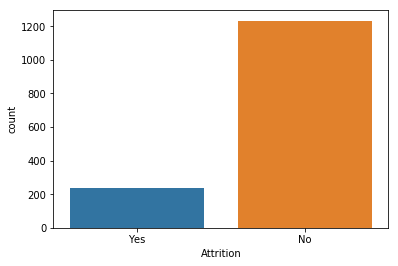

In [6]:
sns.countplot(x='Attrition', data=df)

### Visualización de los datos

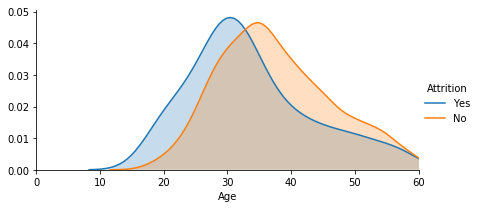

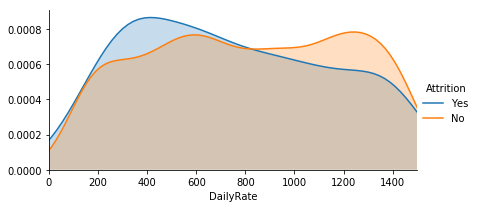

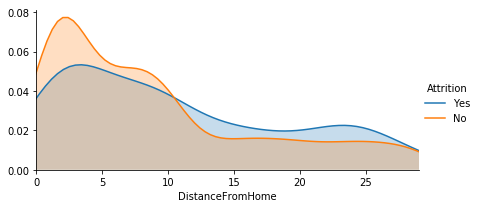

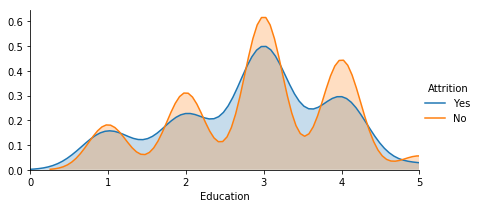

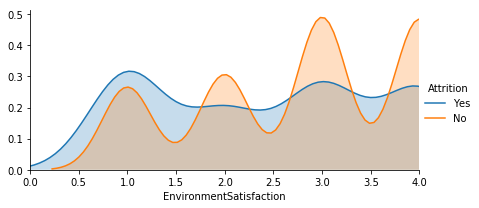

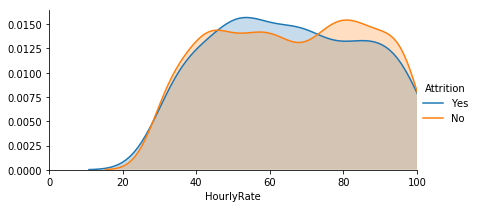

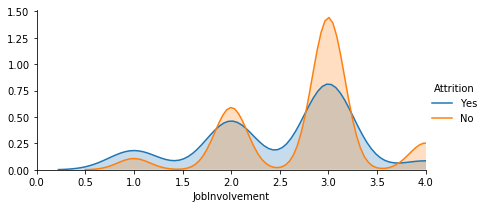

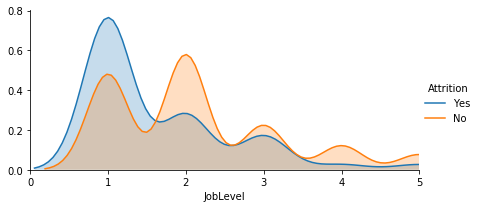

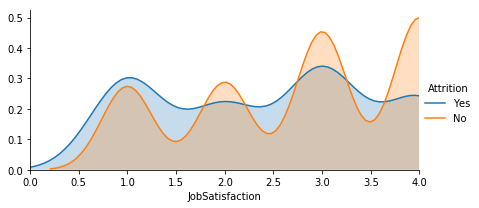

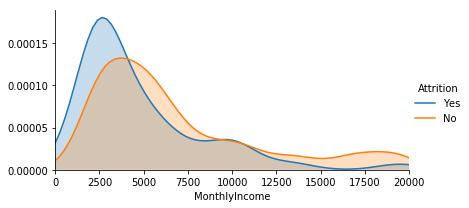

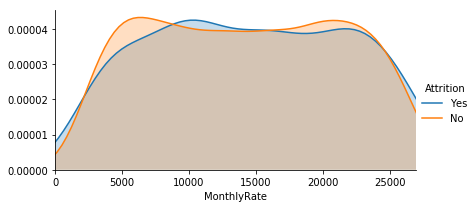

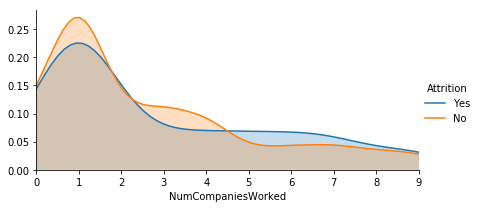

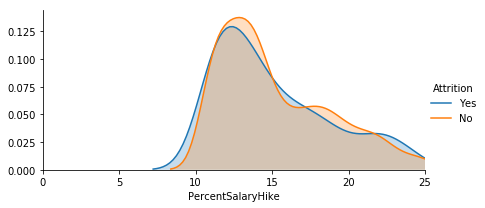

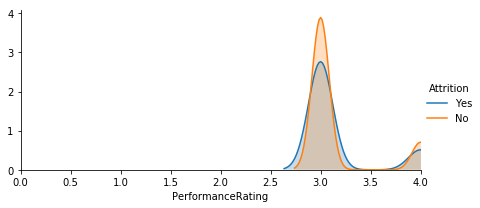

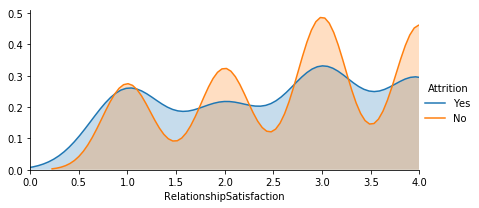

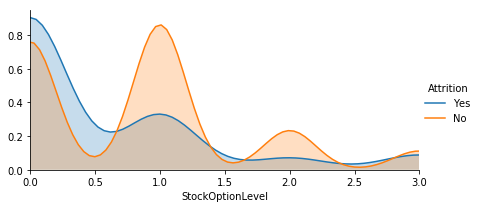

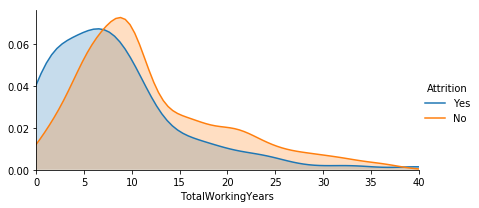

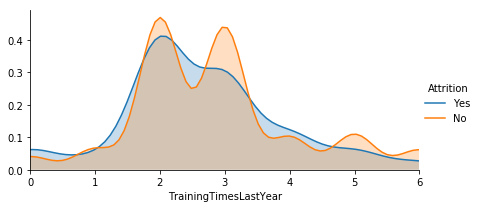

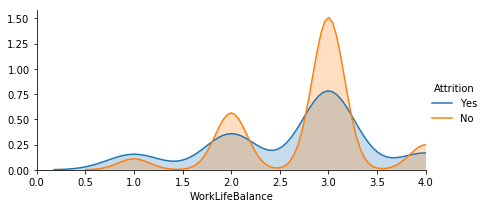

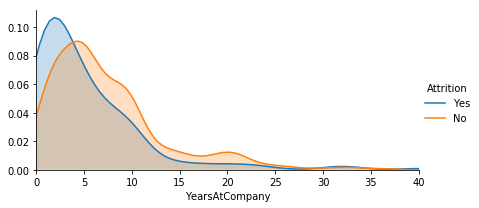

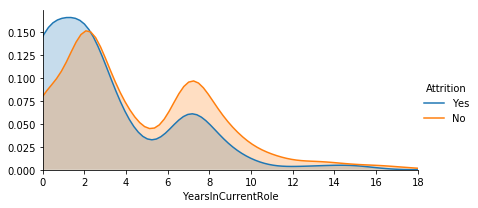

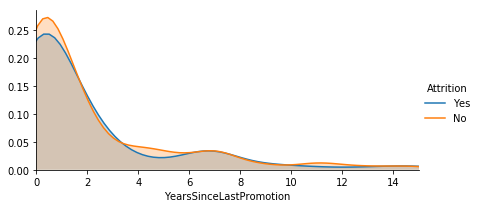

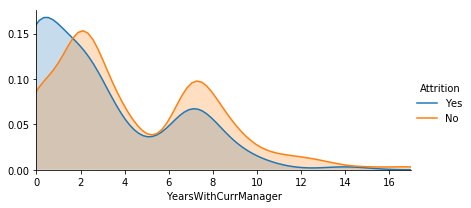

In [7]:
for column in df.select_dtypes(include='int64'):
    fare = sns.FacetGrid(df, hue="Attrition",aspect=2)
    fare.map(sns.kdeplot, column, shade= True)
    fare.set(xlim=(0, df[column].max()))
    fare.add_legend()
    plt.show()

## Preprocesamiento

### Valores nulos

In [8]:
total = df.isnull().sum().sort_values(ascending=False)
percent_1 = df.isnull().sum()/df.isnull().count()*100
percent_2 = (round(percent_1, 1)).sort_values(ascending=False)
missing_data = pd.concat([total, percent_2], axis=1, keys=['Total', '%'])
missing_data.head(5)

,Total,%
YearsWithCurrManager,0,0.0
JobSatisfaction,0,0.0
Attrition,0,0.0
BusinessTravel,0,0.0
DailyRate,0,0.0


### Detección de outliers

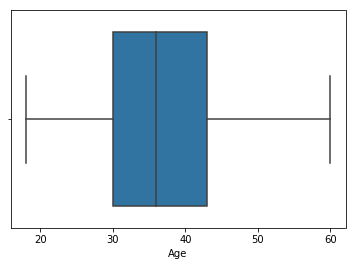

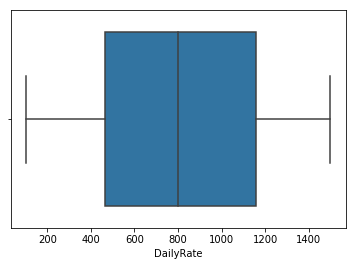

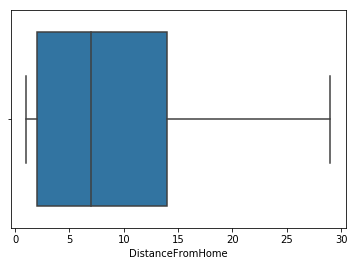

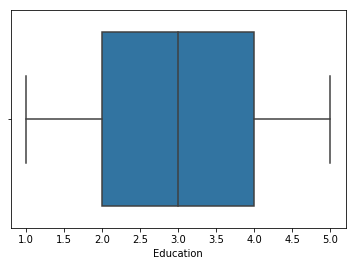

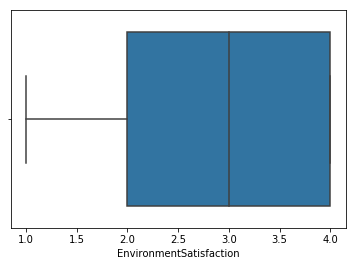

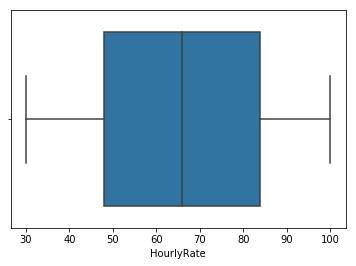

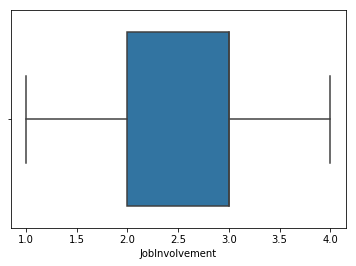

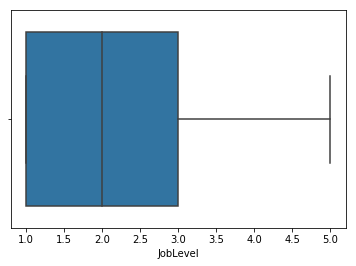

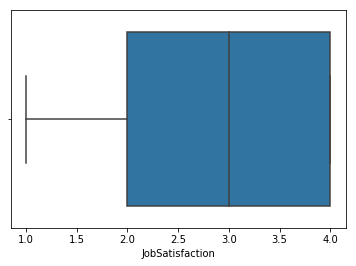

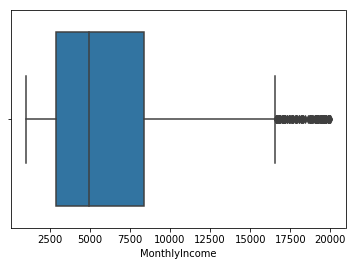

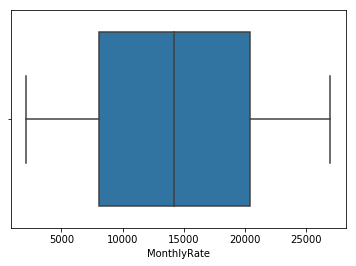

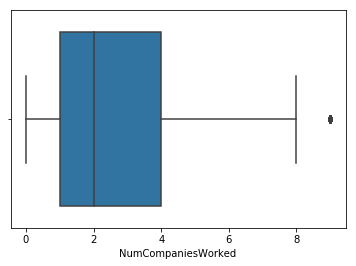

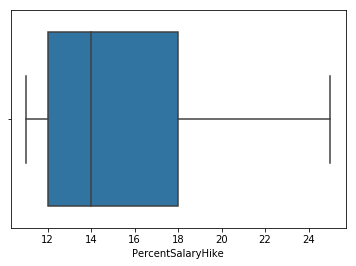

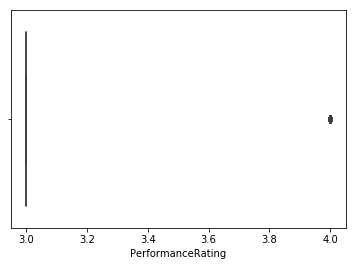

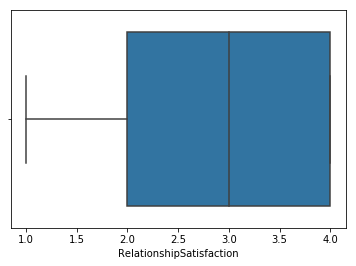

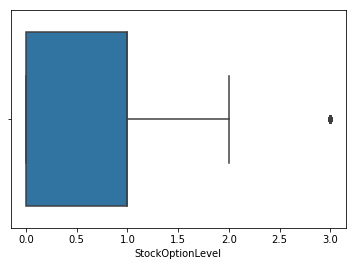

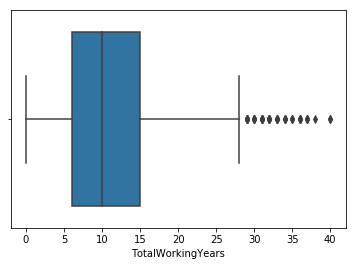

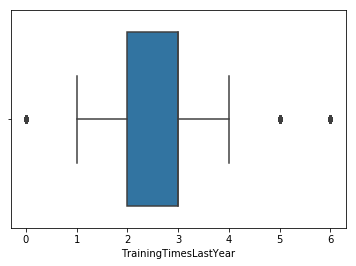

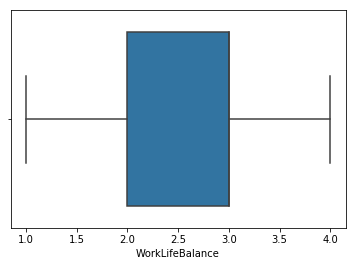

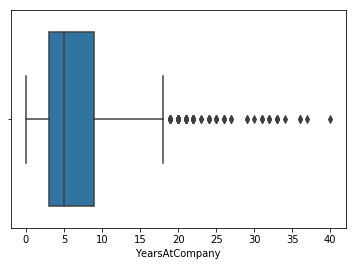

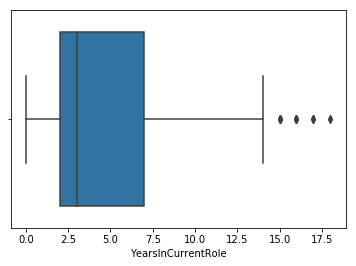

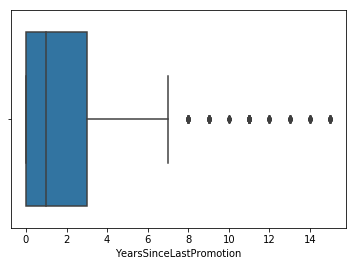

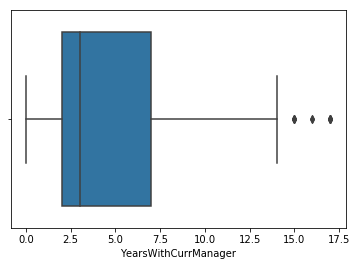

In [9]:
for i, column in enumerate(df.columns):
    if type(df.iat[0, i]) == np.int64:
        sns.boxplot(x=column, data=df)
        plt.show()

### Datos categóricos

In [10]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Yes,11,3,1,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,No,23,4,4,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Yes,15,3,2,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Yes,11,3,3,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,No,12,3,4,1,6,3,3,2,2,2,2


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 31 columns):
Age                         1470 non-null int64
Attrition                   1470 non-null object
BusinessTravel              1470 non-null object
DailyRate                   1470 non-null int64
Department                  1470 non-null object
DistanceFromHome            1470 non-null int64
Education                   1470 non-null int64
EducationField              1470 non-null object
EnvironmentSatisfaction     1470 non-null int64
Gender                      1470 non-null object
HourlyRate                  1470 non-null int64
JobInvolvement              1470 non-null int64
JobLevel                    1470 non-null int64
JobRole                     1470 non-null object
JobSatisfaction             1470 non-null int64
MaritalStatus               1470 non-null object
MonthlyIncome               1470 non-null int64
MonthlyRate                 1470 non-null int64
NumCompaniesWorked    

In [12]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['Attrition'] = le.fit_transform(df['Attrition'])

df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Yes,11,3,1,0,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,No,23,4,4,1,10,3,3,10,7,1,7
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Yes,15,3,2,0,7,3,3,0,0,0,0
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Yes,11,3,3,0,8,3,3,8,7,3,0
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,No,12,3,4,1,6,3,3,2,2,2,2


In [13]:
str_columns = df.select_dtypes(include='object').columns
str_columns

Index(['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole',
       'MaritalStatus', 'OverTime'],
      dtype='object')

In [14]:
dummy_busnstrvl = pd.get_dummies(df['BusinessTravel'], prefix='busns_trvl') 
dummy_dept = pd.get_dummies(df['Department'], prefix='dept') 
dummy_edufield = pd.get_dummies(df['EducationField'], prefix='edufield') 
dummy_gender = pd.get_dummies(df['Gender'], prefix='gend') 
dummy_jobrole = pd.get_dummies(df['JobRole'], prefix='jobrole') 
dummy_maritstat = pd.get_dummies(df['MaritalStatus'], prefix='maritalstat')  
dummy_overtime = pd.get_dummies(df['OverTime'], prefix='overtime') 

In [15]:
continuous_columns = df.select_dtypes(include='int64').columns
hrattr_continuous = df[continuous_columns]
continuous_columns

Index(['Age', 'Attrition', 'DailyRate', 'DistanceFromHome', 'Education',
       'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel',
       'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

In [16]:
df = pd.concat(
    [dummy_busnstrvl, dummy_dept, dummy_edufield, dummy_gender, dummy_jobrole, dummy_maritstat, 
     dummy_overtime, hrattr_continuous], axis=1)
df.head()

,busns_trvl_Non-Travel,busns_trvl_Travel_Frequently,busns_trvl_Travel_Rarely,dept_Human Resources,dept_Research & Development,dept_Sales,edufield_Human Resources,edufield_Life Sciences,edufield_Marketing,edufield_Medical,edufield_Other,edufield_Technical Degree,gend_Female,gend_Male,jobrole_Healthcare Representative,jobrole_Human Resources,jobrole_Laboratory Technician,jobrole_Manager,jobrole_Manufacturing Director,jobrole_Research Director,jobrole_Research Scientist,jobrole_Sales Executive,jobrole_Sales Representative,maritalstat_Divorced,maritalstat_Married,maritalstat_Single,overtime_No,overtime_Yes,Age,Attrition,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,41,1,1102,1,2,2,94,3,2,4,5993,19479,8,11,3,1,0,8,0,1,6,4,0,5
1,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,1,0,49,0,279,8,1,3,61,2,2,2,5130,24907,1,23,4,4,1,10,3,3,10,7,1,7
2,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,1,37,1,1373,2,2,4,92,2,1,3,2090,2396,6,15,3,2,0,7,3,3,0,0,0,0
3,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,33,0,1392,3,4,4,56,3,1,3,2909,23159,1,11,3,3,0,8,3,3,8,7,3,0
4,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0,27,0,591,2,1,1,40,3,1,2,3468,16632,9,12,3,4,1,6,3,3,2,2,2,2


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 52 columns):
busns_trvl_Non-Travel                1470 non-null uint8
busns_trvl_Travel_Frequently         1470 non-null uint8
busns_trvl_Travel_Rarely             1470 non-null uint8
dept_Human Resources                 1470 non-null uint8
dept_Research & Development          1470 non-null uint8
dept_Sales                           1470 non-null uint8
edufield_Human Resources             1470 non-null uint8
edufield_Life Sciences               1470 non-null uint8
edufield_Marketing                   1470 non-null uint8
edufield_Medical                     1470 non-null uint8
edufield_Other                       1470 non-null uint8
edufield_Technical Degree            1470 non-null uint8
gend_Female                          1470 non-null uint8
gend_Male                            1470 non-null uint8
jobrole_Healthcare Representative    1470 non-null uint8
jobrole_Human Resources              1

## Selección de variables

In [18]:
df.head()

,busns_trvl_Non-Travel,busns_trvl_Travel_Frequently,busns_trvl_Travel_Rarely,dept_Human Resources,dept_Research & Development,dept_Sales,edufield_Human Resources,edufield_Life Sciences,edufield_Marketing,edufield_Medical,edufield_Other,edufield_Technical Degree,gend_Female,gend_Male,jobrole_Healthcare Representative,jobrole_Human Resources,jobrole_Laboratory Technician,jobrole_Manager,jobrole_Manufacturing Director,jobrole_Research Director,jobrole_Research Scientist,jobrole_Sales Executive,jobrole_Sales Representative,maritalstat_Divorced,maritalstat_Married,maritalstat_Single,overtime_No,overtime_Yes,Age,Attrition,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,41,1,1102,1,2,2,94,3,2,4,5993,19479,8,11,3,1,0,8,0,1,6,4,0,5
1,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,1,0,49,0,279,8,1,3,61,2,2,2,5130,24907,1,23,4,4,1,10,3,3,10,7,1,7
2,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,1,37,1,1373,2,2,4,92,2,1,3,2090,2396,6,15,3,2,0,7,3,3,0,0,0,0
3,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,33,0,1392,3,4,4,56,3,1,3,2909,23159,1,11,3,3,0,8,3,3,8,7,3,0
4,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0,27,0,591,2,1,1,40,3,1,2,3468,16632,9,12,3,4,1,6,3,3,2,2,2,2


In [19]:
# sns.heatmap(df.corr(), annot=True, cbar=True)

# Entrenando los modelos

In [20]:
from sklearn.model_selection import train_test_split

X = df.drop("Attrition", axis=1)
y = df["Attrition"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [21]:
y.shape

(1470,)

## Logistic Regression

In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

logreg = LogisticRegression(solver='liblinear')
logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)

print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

0.8707482993197279
[[365  15]
 [ 42  19]]


In [23]:
from sklearn.model_selection import cross_val_score

logreg = LogisticRegression(solver='liblinear')
scores = cross_val_score(logreg, X_train, y_train, cv=10, scoring = "accuracy")

print("Scores:", scores)
print("Mean:", scores.mean())
print("Standard Deviation:", scores.std())

Scores: [0.86538462 0.88461538 0.86538462 0.85436893 0.81553398 0.86407767
 0.88235294 0.88235294 0.91176471 0.8627451 ]
Mean: 0.8688580884183397
Standard Deviation: 0.023645801993244328


## Naïve Bayes

In [24]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix

gaussian = GaussianNB() 
gaussian.fit(X_train, y_train)  

y_pred = gaussian.predict(X_test)  

print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

0.7346938775510204
[[285  95]
 [ 22  39]]


In [25]:
from sklearn.model_selection import cross_val_score

gaussian = GaussianNB() 
scores = cross_val_score(gaussian, X_train, y_train, cv=10, scoring = "accuracy")

print("Scores:", scores)
print("Mean:", scores.mean())
print("Standard Deviation:", scores.std())

Scores: [0.80769231 0.71153846 0.83653846 0.76699029 0.70873786 0.80582524
 0.68627451 0.65686275 0.70588235 0.76470588]
Mean: 0.7451048119023562
Standard Deviation: 0.056624002560601676


## Decision tree

In [26]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

decision_tree = DecisionTreeClassifier() 
decision_tree.fit(X_train, y_train) 

y_pred = decision_tree.predict(X_test)  

print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

0.7777777777777778
[[321  59]
 [ 39  22]]


In [27]:
from sklearn.model_selection import cross_val_score

decision_tree = DecisionTreeClassifier() 
scores = cross_val_score(decision_tree, X_train, y_train, cv=10, scoring = "accuracy")

print("Scores:", scores)
print("Mean:", scores.mean())
print("Standard Deviation:", scores.std())

Scores: [0.79807692 0.75       0.75961538 0.74757282 0.77669903 0.80582524
 0.74509804 0.76470588 0.81372549 0.73529412]
Mean: 0.7696612924482713
Standard Deviation: 0.026250452041037573


## Random forest

In [28]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, y_train)

y_pred = random_forest.predict(X_test)

print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

0.8684807256235828
[[377   3]
 [ 55   6]]


In [29]:
from sklearn.model_selection import cross_val_score

rf = RandomForestClassifier(n_estimators=100)
scores = cross_val_score(rf, X_train, y_train, cv=10, scoring = "accuracy")

print("Scores:", scores)
print("Mean:", scores.mean())
print("Standard Deviation:", scores.std())

Scores: [0.89423077 0.86538462 0.86538462 0.83495146 0.83495146 0.84466019
 0.84313725 0.8627451  0.8627451  0.85294118]
Mean: 0.8561131734247098
Standard Deviation: 0.01708238429659396


In [30]:
importances = pd.DataFrame({'feature':X_train.columns,'importance':np.round(random_forest.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False).set_index('feature')
importances.head(15)

,importance
feature,
MonthlyIncome,0.080
Age,0.059
TotalWorkingYears,0.052
DailyRate,0.047
DistanceFromHome,0.045
MonthlyRate,0.044
YearsAtCompany,0.040
HourlyRate,0.040
NumCompaniesWorked,0.036


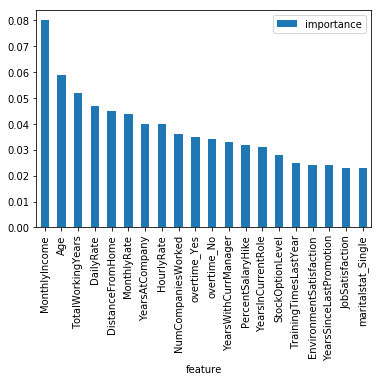

In [31]:
importances[:20].plot.bar()

## Support Vector Machine

In [32]:
from sklearn.svm import SVC, LinearSVC
from sklearn.metrics import accuracy_score, confusion_matrix

linear_svc = LinearSVC(max_iter=10000)
linear_svc.fit(X_train, y_train)

y_pred = linear_svc.predict(X_test)

print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

0.2675736961451247
[[ 64 316]
 [  7  54]]


/home/alicia/workspace/intro_ml_python/venv/lib/python3.6/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [33]:
from sklearn.model_selection import cross_val_score

linear_svc = LinearSVC()
scores = cross_val_score(linear_svc, X_train, y_train, cv=10, scoring = "accuracy")

print("Scores:", scores)
print("Mean:", scores.mean())
print("Standard Deviation:", scores.std())

/home/alicia/workspace/intro_ml_python/venv/lib/python3.6/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/home/alicia/workspace/intro_ml_python/venv/lib/python3.6/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/home/alicia/workspace/intro_ml_python/venv/lib/python3.6/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/home/alicia/workspace/intro_ml_python/venv/lib/python3.6/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/home/alicia/workspace/intro_ml_python/venv/lib/python3.6/site-packa

Scores: [0.82692308 0.82692308 0.82692308 0.30097087 0.47572816 0.82524272
 0.83333333 0.83333333 0.16666667 0.83333333]
Mean: 0.6749377645008712
Standard Deviation: 0.24597415841109566


/home/alicia/workspace/intro_ml_python/venv/lib/python3.6/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


### K Nearest Neighbors

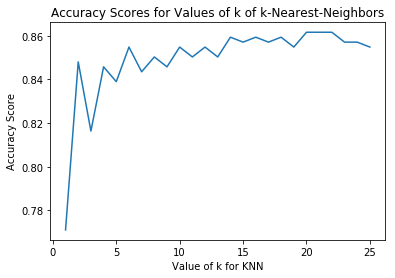

In [34]:
from sklearn.neighbors import KNeighborsClassifier

# experimenting with different n values
k_range = list(range(1,26))
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    scores.append(accuracy_score(y_test, y_pred))
    
plt.plot(k_range, scores)
plt.xlabel('Value of k for KNN')
plt.ylabel('Accuracy Score')
plt.title('Accuracy Scores for Values of k of k-Nearest-Neighbors')
plt.show()

In [35]:
from sklearn.metrics import accuracy_score, confusion_matrix

knn = KNeighborsClassifier(n_neighbors =22) 
knn.fit(X_train, y_train)  

y_pred = knn.predict(X_test)  

print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

0.8616780045351474
[[380   0]
 [ 61   0]]


In [36]:
from sklearn.model_selection import cross_val_score

knn = KNeighborsClassifier(n_neighbors =22) 
scores = cross_val_score(knn, X_train, y_train, cv=10, scoring = "accuracy")

print("Scores:", scores)
print("Mean:", scores.mean())
print("Standard Deviation:", scores.std())

Scores: [0.82692308 0.82692308 0.83653846 0.82524272 0.82524272 0.82524272
 0.82352941 0.84313725 0.84313725 0.83333333]
Mean: 0.8309250025626381
Standard Deviation: 0.007205413467654737
